# Plotting procedures
This file is made for visualizing the results. It uses Json objects to communicate with other notebokes
- For model V17 and newer

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import random as rnd
import pandas as pd
import numpy as np
import time
import datetime
import calendar
import json

# fix what is missing with the datetime/time/calendar package
def add_months(sourcedate,months):
    month = sourcedate.month - 1 + months
    year = int(sourcedate.year + month / 12 )
    month = month % 12 + 1
    day = min(sourcedate.day,calendar.monthrange(year, month)[1])
    return datetime.date(year,month,day)


In [15]:
# make initialization dictionary
# reading excel data (back)
input_file = 'init_buyers_sellers_lng.xlsx'
df_buyer = pd.read_excel(input_file, orient='index',sheetname='buyers')
df_seller = pd.read_excel(input_file, orient='index',sheetname='sellers')
df_buyer['market'] = [eval(i) for i in df_buyer['market'].values]
df_seller['market'] = [eval(i) for i in df_seller['market'].values]
init_buyer = df_buyer.to_dict('index')
init_seller = df_seller.to_dict('index')

# getting all unique markets
market = []
for i in init_seller:
    for x in init_seller[i]['market']: market.append(x)
for i in init_buyer:
    for x in init_buyer[i]['market']: market.append(x)
market = list(set(market))
init_market = market

# Reading data back
with open('marketdata.json', 'r') as f:
     run_market = json.load(f)
        
# Reading data back
with open('sellerdata.json', 'r') as f:
     run_seller = json.load(f)# Show some real consumption data, for more data see folder data analytics
        
# Reading data back
with open('buyerdata.json', 'r') as f:
     run_buyer = json.load(f)

## Scenarios & CBS data

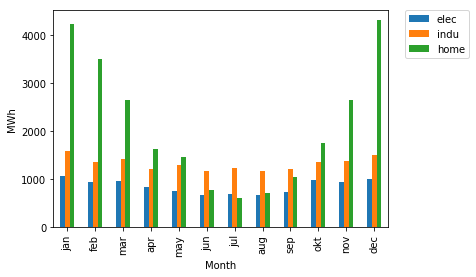

In [7]:
# Show some real consumption data, for more data see folder data analytics
#read montly consumption data of 2010 into a dataframe
df = pd.read_csv('2010cbstestrun.csv', header=0, index_col=0)
df = df.transpose()

#plot the 2010 monthly consumption data
df.plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('MWh')
plt.xlabel('Month')
filepath = 'plots/cbs_data.png'
plt.savefig(filepath, bbox_inches='tight')
plt.show();

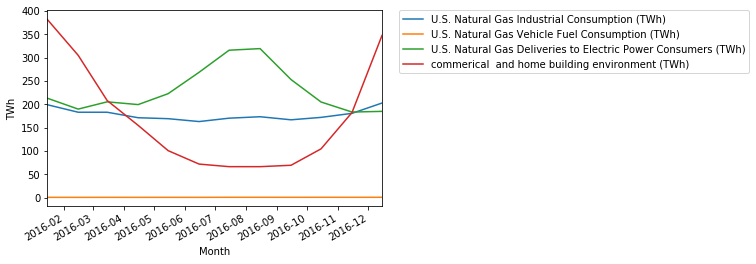

['U.S. Natural Gas Industrial Consumption (TWh)',
 'U.S. Natural Gas Vehicle Fuel Consumption (TWh)',
 'U.S. Natural Gas Deliveries to Electric Power Consumers (TWh)',
 'commerical  and home building environment (TWh)']

In [38]:
df = pd.read_excel('US_monthly_inputdata.xlsx', header=[0,1], index_col=0)
#print(df.index)
df.index = pd.to_datetime(df.index)
header_list = list(df['TWh'].columns.values)
df['TWh'][header_list[-4:]].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('TWh')
plt.xlabel('Month')
filepath = 'plots/us_data.png'
plt.savefig(filepath, bbox_inches='tight')
plt.show()
header_list[-4:]

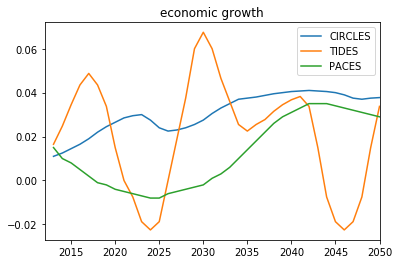

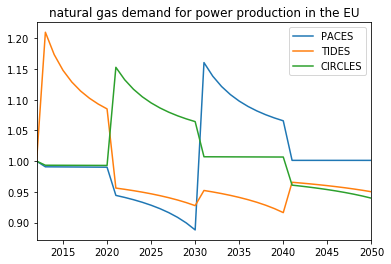

In [17]:
# import scenarios
inputfile = 'economic growth scenarios.xlsx'
economic_growth = pd.read_excel(inputfile, sheet='ec_growth', skiprows=0, index_col=0, header=[0,1])
economic_growth = economic_growth['ECONOMIC GROWTH'][['CIRCLES','TIDES','PACES']]

# demand for electricity import scenarios spaced by excel
elec_space = pd.read_excel(inputfile, sheetname='elec_space', index_col=0, header=[0,1])
elec_space = elec_space['RELATIVE']

# gasdemand home (percentage increases)
home_savings = {'PACES': 1.01, 'TIDES': .99, 'CIRCLES': .97}

economic_growth.plot(title= 'economic growth')
filepath = 'plots/scen_econ_growth.png'
plt.savefig(filepath, bbox_inches='tight')
plt.show()

elec_space.plot(title='natural gas demand for power production in the EU')
filepath = 'plots/scen_elec_demand.png'
plt.savefig(filepath, bbox_inches='tight')
plt.show()

## reserves
In 'reserves' we examine the reserve level of the sellers.

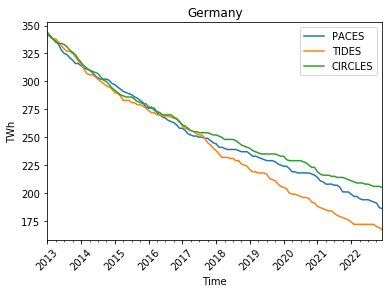

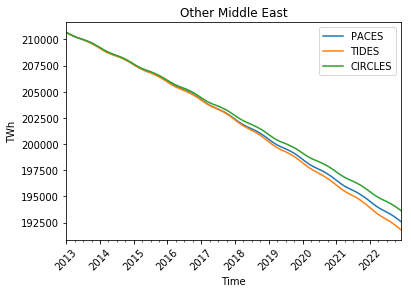

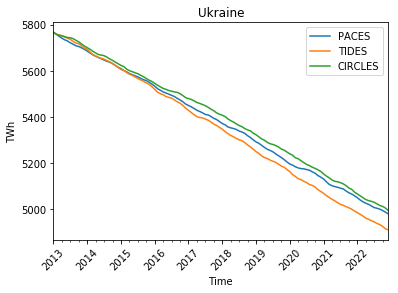

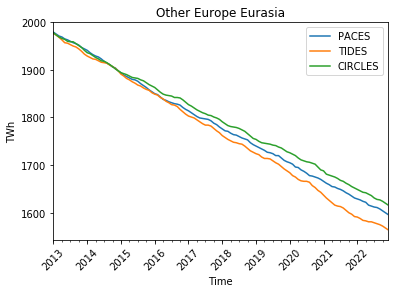

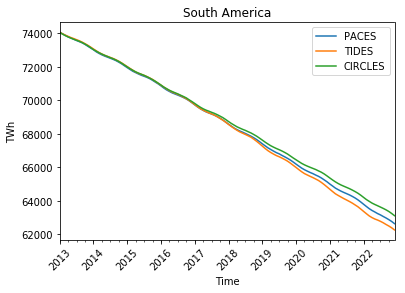

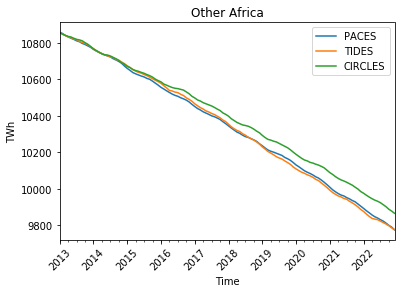

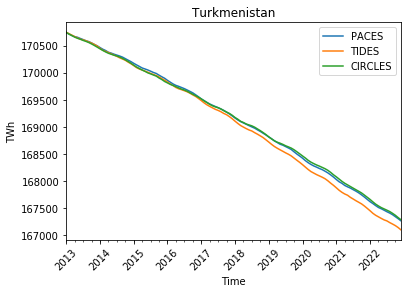

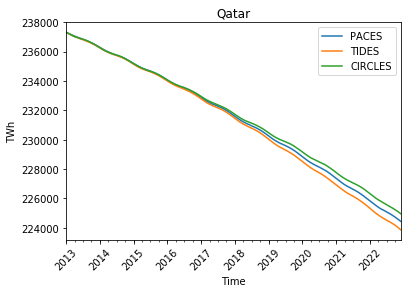

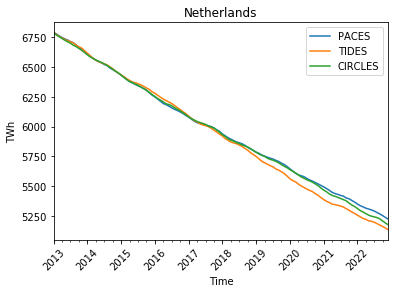

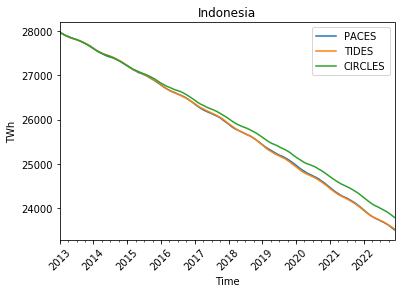

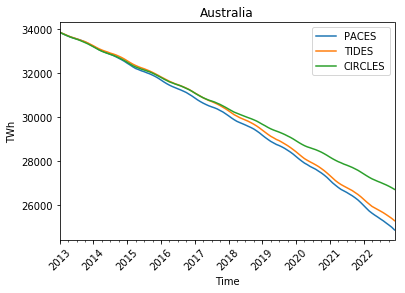

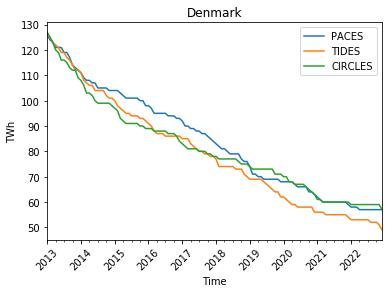

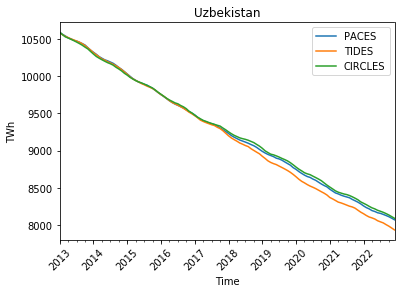

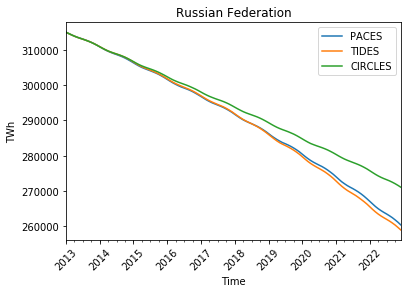

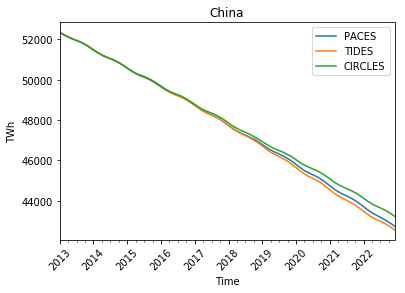

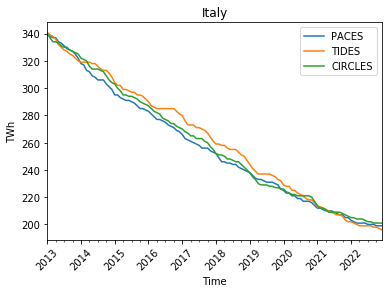

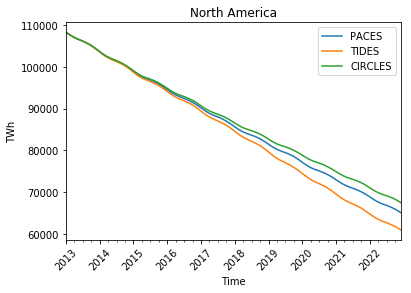

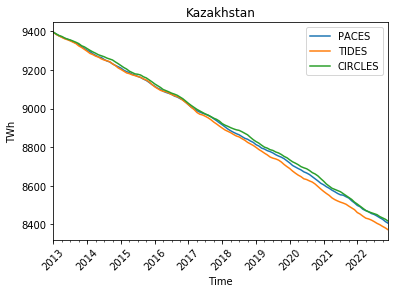

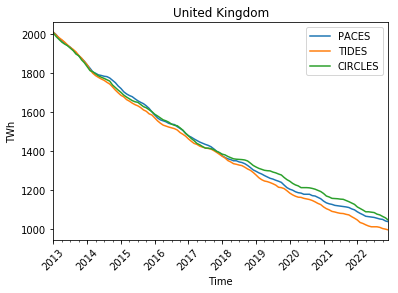

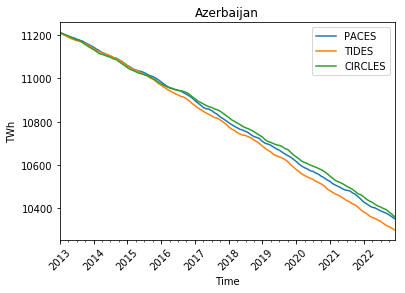

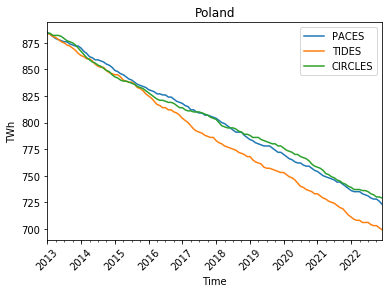

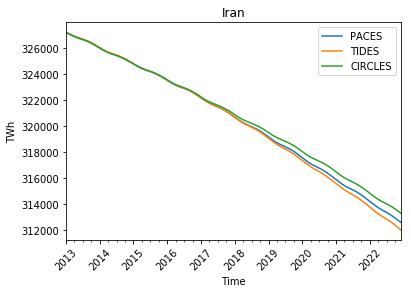

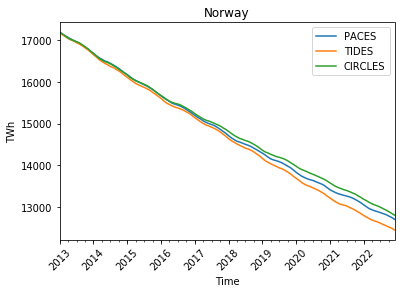

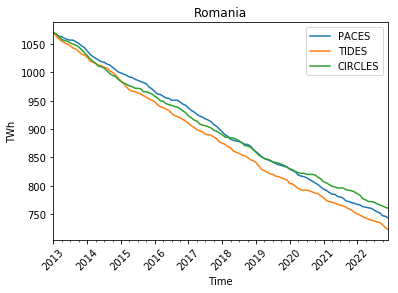

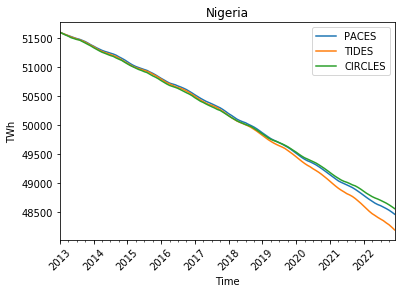

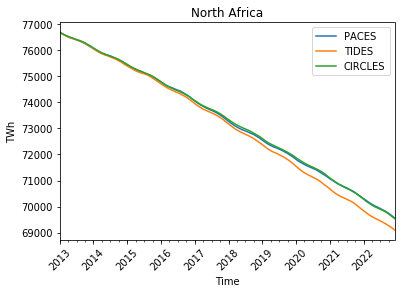

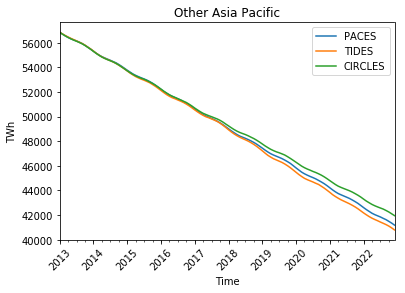

In [18]:
# Reserves
for reserve in init_seller:
    for scen in run_seller:
        df_res = pd.DataFrame(run_seller[scen])
        df_res = df_res[df_res[3]==reserve]
        df_res = df_res.set_index(0)
        df_res.index = pd.to_datetime(df_res.index)
        #for i in df_res.columns:
        df_res[1].plot(label="%s" % (scen),rot=45, title=reserve)
    plt.legend()
    plt.ylabel('TWh')
    plt.xlabel('Time')
    filepath = 'plots/reserve_%s.png' %(reserve)
    plt.savefig(filepath, bbox_inches='tight')
    plt.show()

## Prices

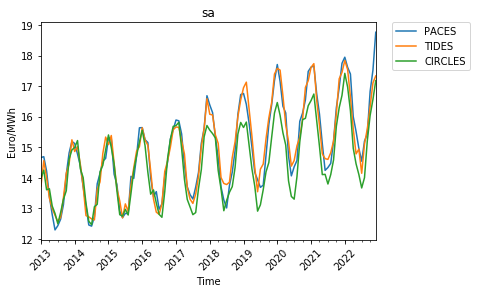

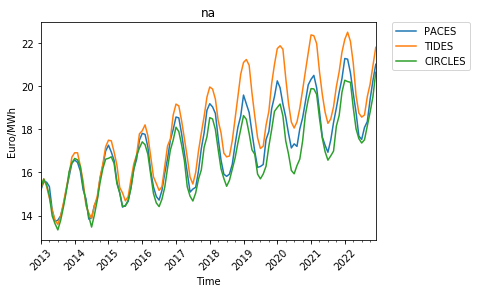

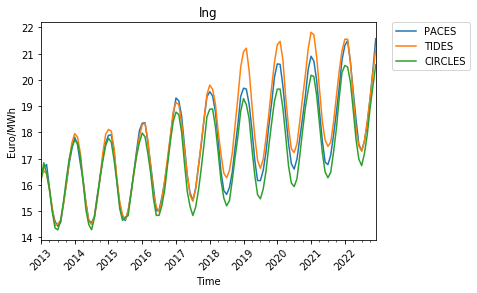

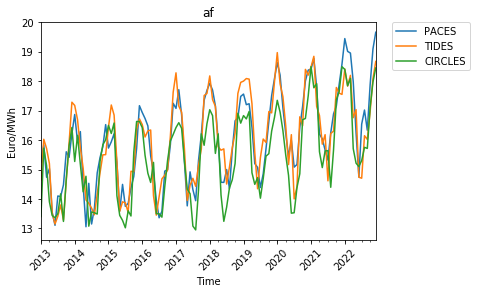

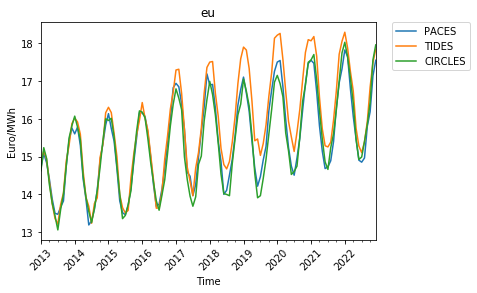

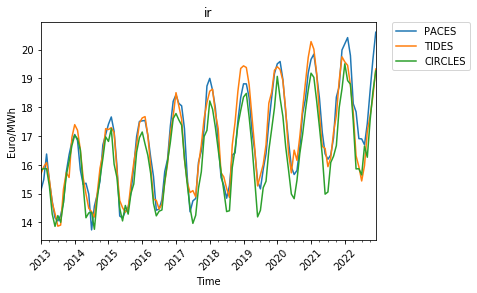

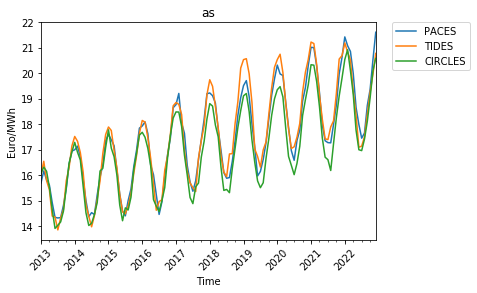

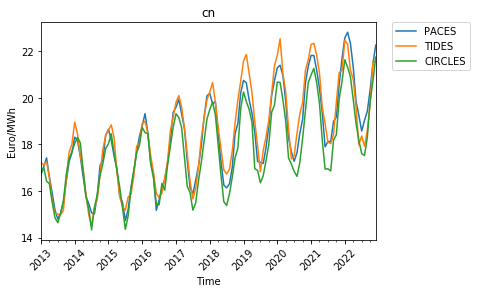

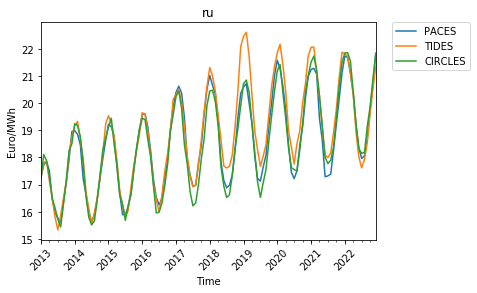

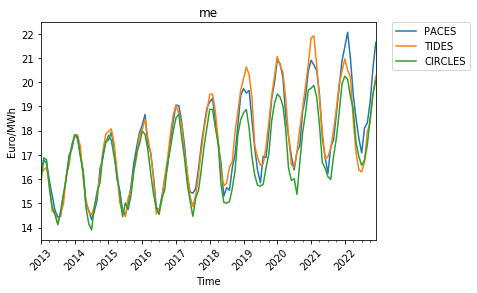

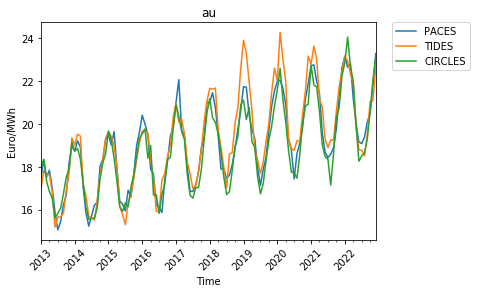

In [19]:
plt.subplots()
for market in init_market:
    for i in run_market:
        run_df = pd.DataFrame(run_market[i])
        run_df = run_df[run_df[3]==market]
        run_df.set_index(0, inplace=True)
        run_df.index = pd.to_datetime(run_df.index)
        run_df[1].plot(label=i, rot=45, title=market)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel('Euro/MWh')
    plt.xlabel('Time')
    filepath = 'plots/market_price_Monthly_%s.png' %(market)
    plt.savefig(filepath, bbox_inches='tight')
    plt.show()

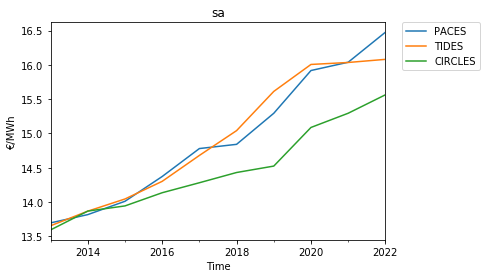

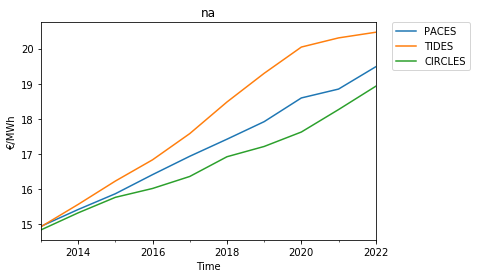

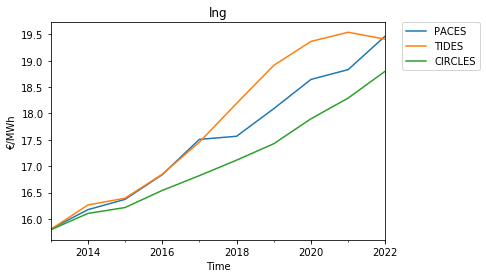

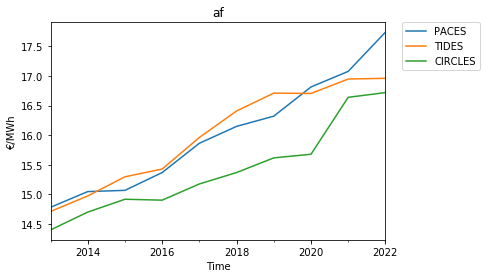

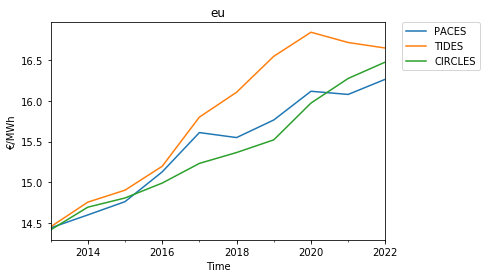

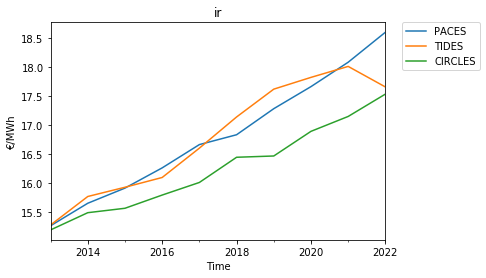

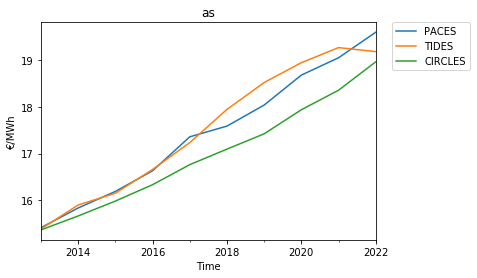

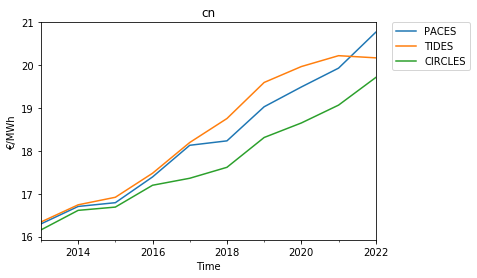

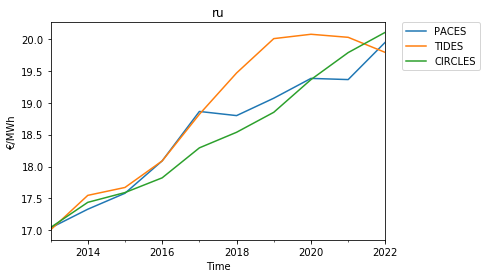

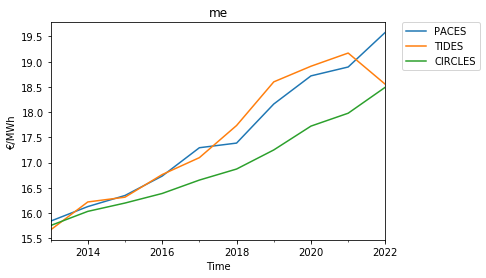

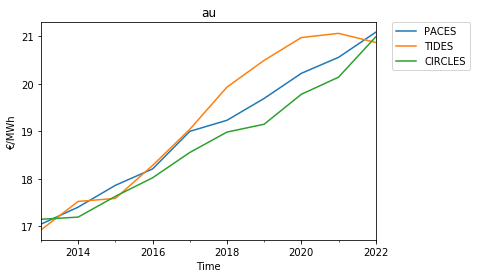

In [20]:
plt.subplots()
for market in init_market:
    for i in run_market:
        run_df = pd.DataFrame(run_market[i])
        run_df = run_df[run_df[3]==market]
        run_df.set_index(0, inplace=True)
        run_df.index = pd.to_datetime(run_df.index)
        run_df.index.name = 'month'
        run_df.rename(columns={1: 'price', 2: 'quantity'}, inplace=True)
        run_df = run_df['price'].resample('A').mean().plot(label=i, title=market)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel('€/MWh')
    plt.xlabel('Time')
    filepath = 'plots/market_price_Yearly_%s.png' %(market)
    plt.savefig(filepath, bbox_inches='tight')
    plt.show();

## Quantity

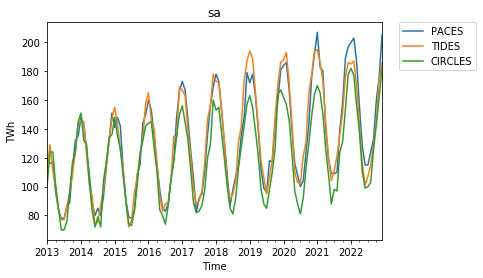

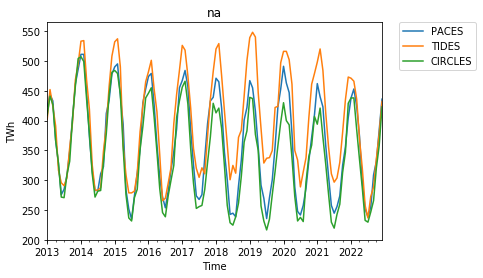

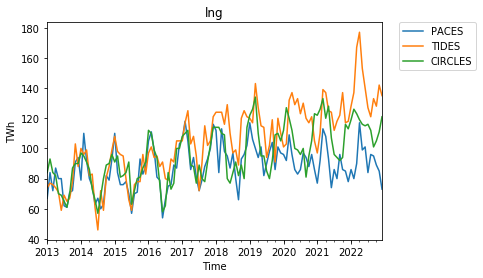

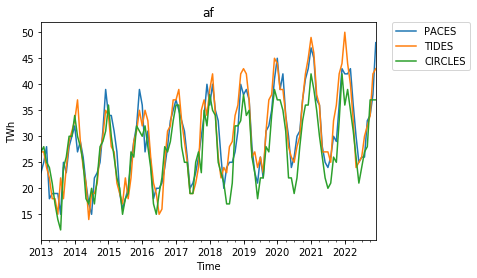

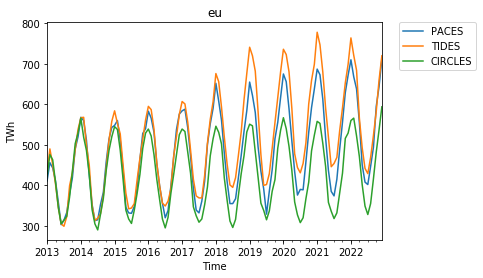

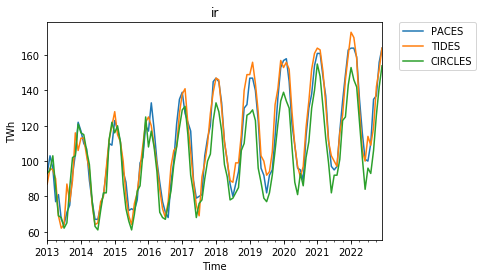

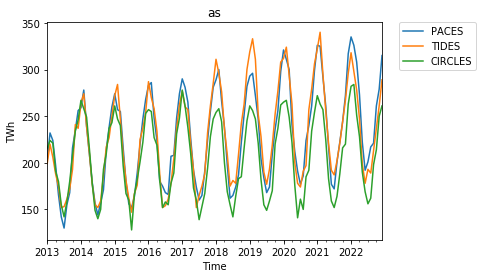

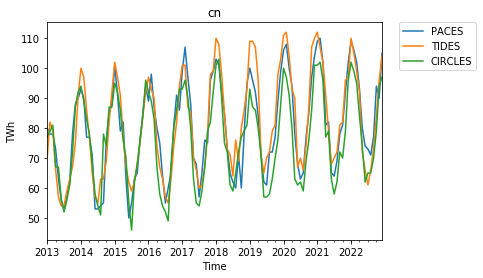

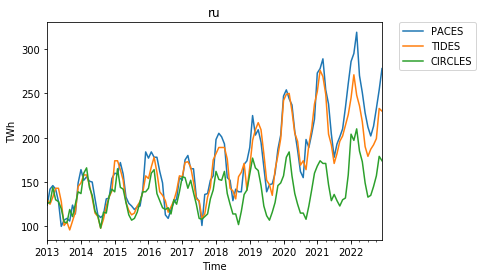

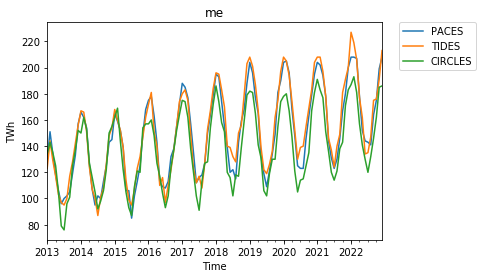

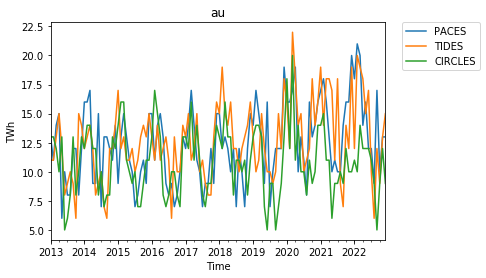

In [21]:
plt.subplots()
for market in init_market:
    for i in run_market:
        run_df = pd.DataFrame(run_market[i])
        run_df = run_df[run_df[3]==market]
        run_df.set_index(0, inplace=True)
        run_df.index = pd.to_datetime(run_df.index)
        run_df[2].plot(label=i, title=market)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel('TWh')
    plt.xlabel('Time')
    filepath = 'plots/market_quantity_Monthly_%s.png' %(market)
    plt.savefig(filepath, bbox_inches='tight')
    plt.show()

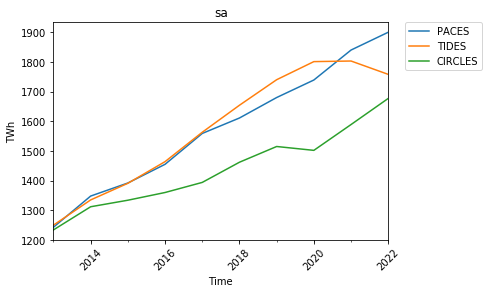

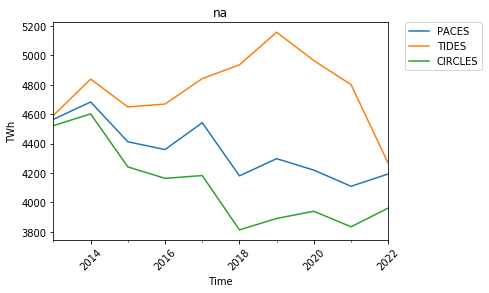

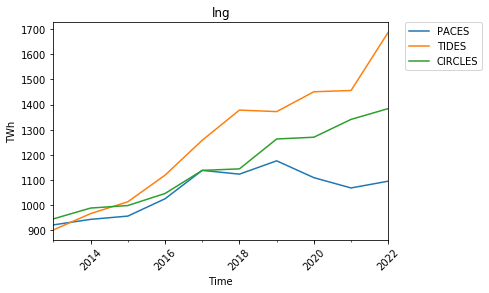

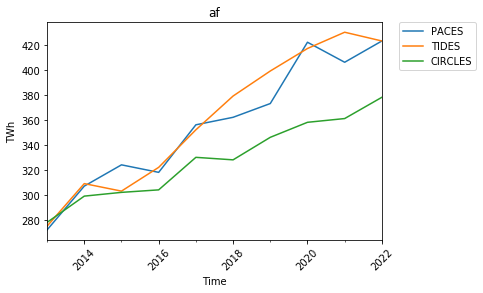

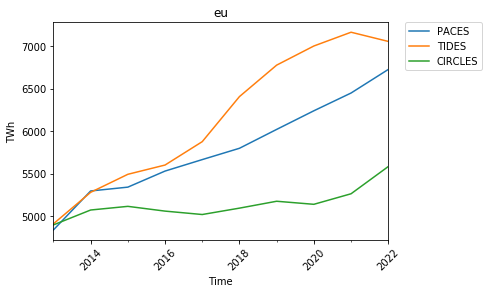

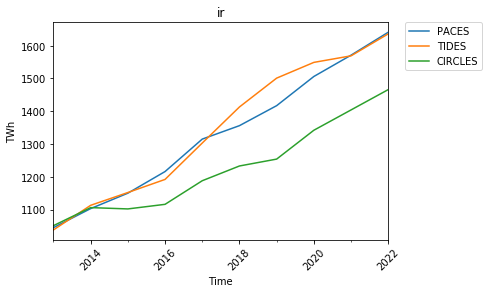

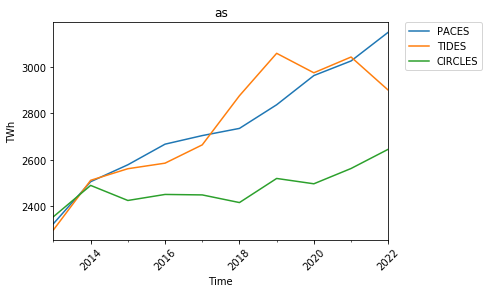

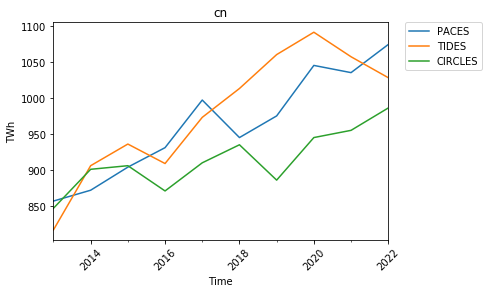

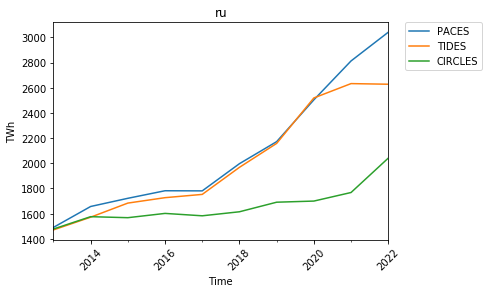

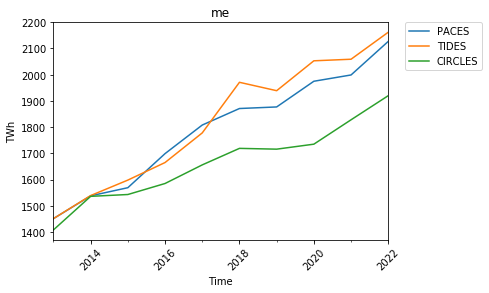

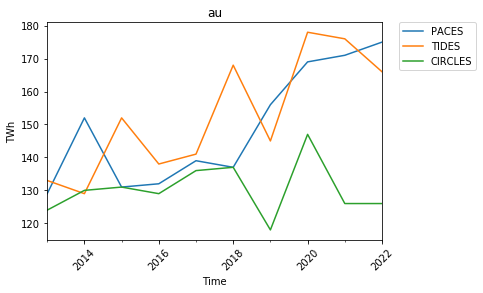

In [22]:
plt.subplots()
for market in init_market:
    for i in run_market:
        run_df = pd.DataFrame(run_market[i])
        run_df = run_df[run_df[3]==market]
        run_df.set_index(0, inplace=True)
        run_df.index = pd.to_datetime(run_df.index)
        run_df.index.name = 'month'
        run_df.rename(columns={1: 'price', 2: 'quantity'}, inplace=True)
        run_df = run_df['quantity'].resample('A').sum().plot(label='%s'%(i),rot=45, title=market)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel('TWh')
    plt.xlabel('Time')
    filepath = 'plots/market_quantity_Yearly_%s.png' %(market)
    plt.savefig(filepath, bbox_inches='tight')
    plt.show()

## Let us focus on some agents
### buyers
What did they buy?


In [23]:
#for i in run_buyer: print(run_buyer[i])

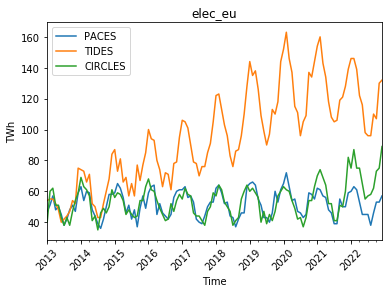

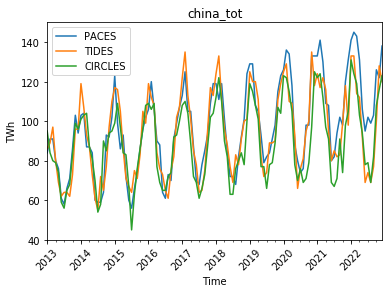

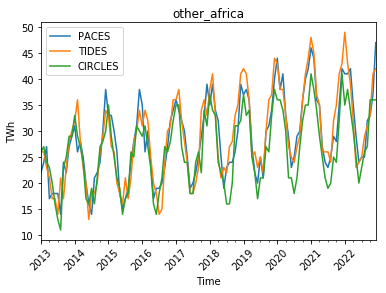

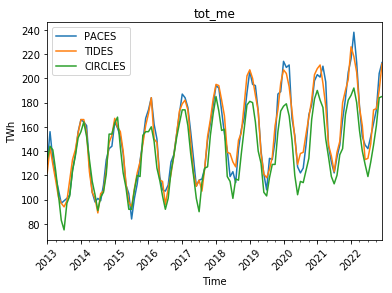

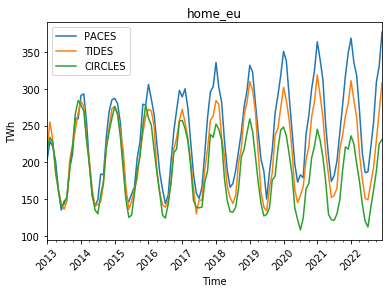

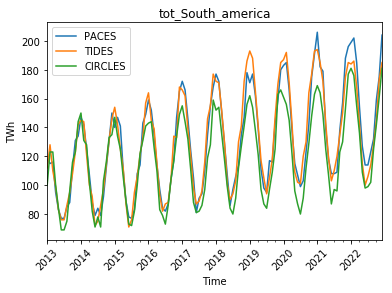

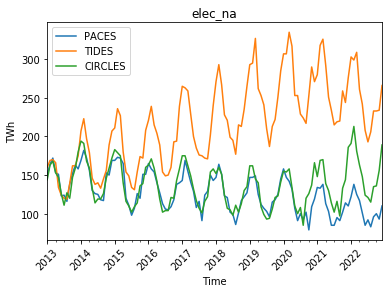

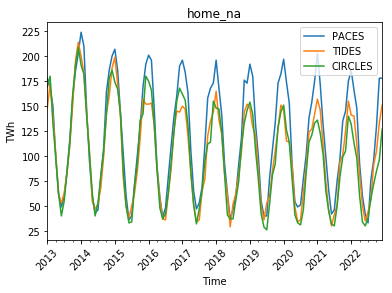

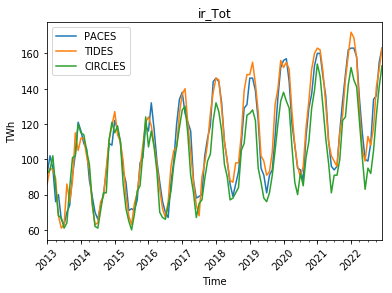

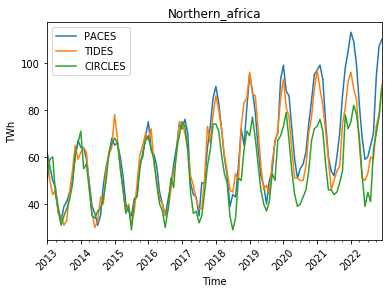

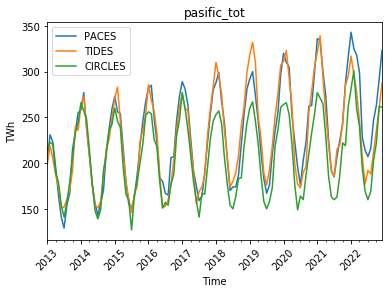

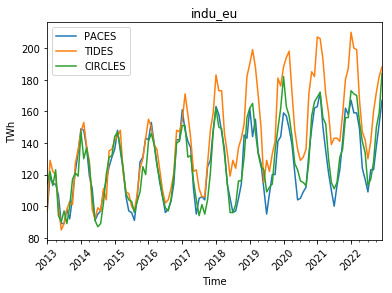

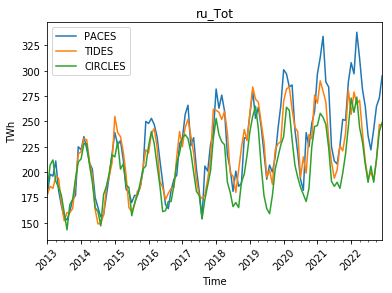

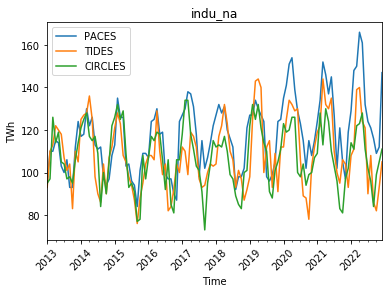

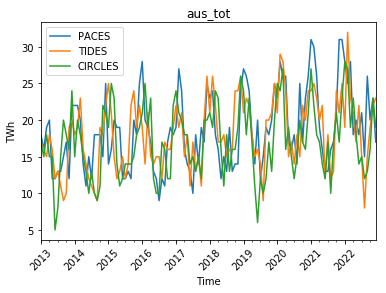

In [24]:
# What did buyers consume?
for buyer in init_buyer:
    for scen in run_buyer:
        df_buy = pd.DataFrame(run_buyer[scen])
        df_buy = df_buy[df_buy[3]==buyer]
        df_buy = df_buy.set_index(0)
        df_buy.index = pd.to_datetime(df_buy.index)
        df_buy[2].plot(label="%s" % (scen),rot=45, title=buyer)
    plt.legend()
    plt.ylabel('TWh')
    plt.xlabel('Time')
    filepath = 'plots/buyer_quantity_Monthly_%s.png' %(buyer)
    plt.savefig(filepath, bbox_inches='tight')
    plt.show()

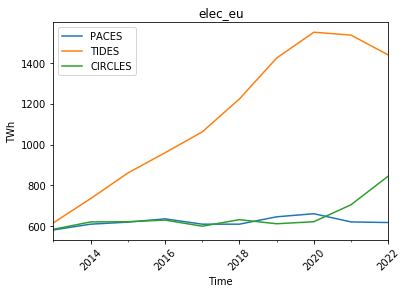

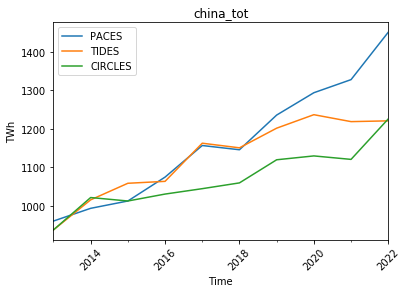

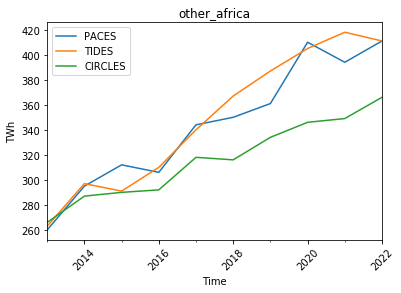

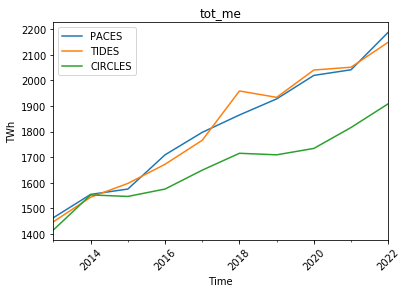

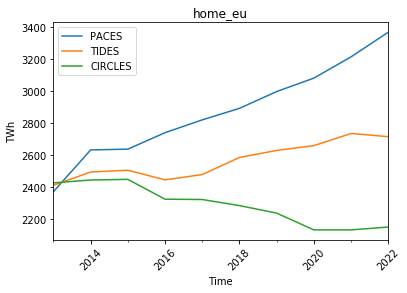

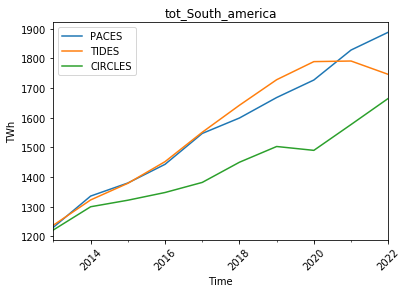

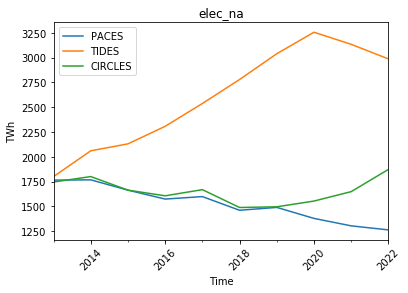

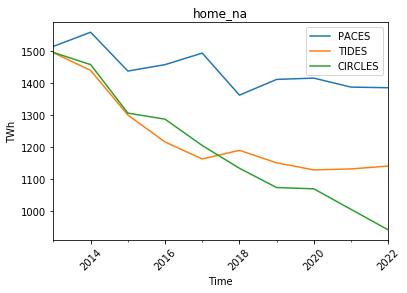

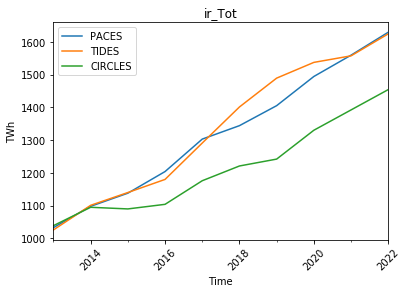

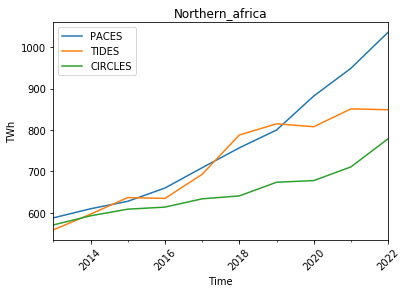

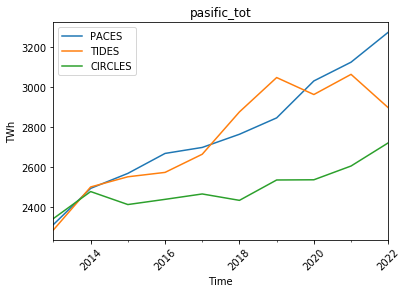

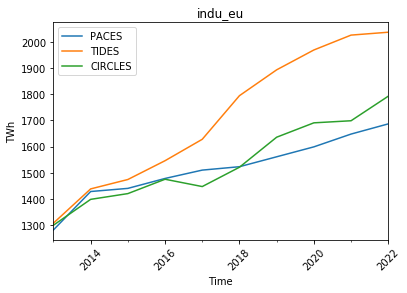

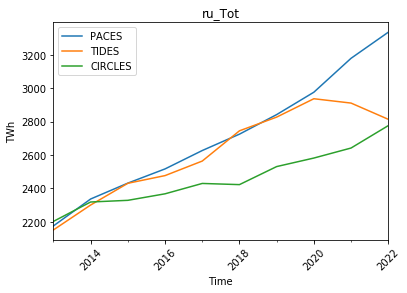

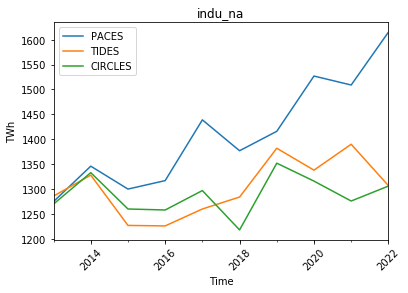

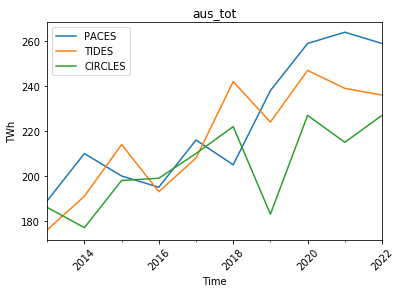

In [25]:
# What did buyers consume?
for buyer in init_buyer:
    for scen in run_buyer:
        df_buy = pd.DataFrame(run_buyer[scen])
        df_buy = df_buy[df_buy[3]==buyer]
        df_buy = df_buy.set_index(0)
        df_buy.index = pd.to_datetime(df_buy.index)
        df_buy[2].resample('A').sum().plot(label="%s" % (scen),rot=45, title=buyer)
    plt.legend()
    plt.ylabel('TWh')
    plt.xlabel('Time')
    filepath = 'plots/buyer_quantity_Yearly_%s.png' %(buyer)
    plt.savefig(filepath, bbox_inches='tight')
    plt.show()

### sellers
What did they buy?

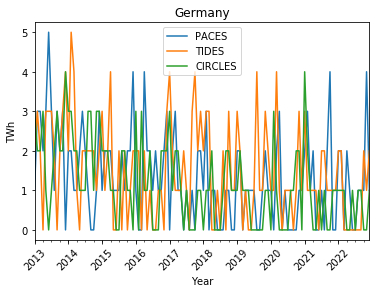

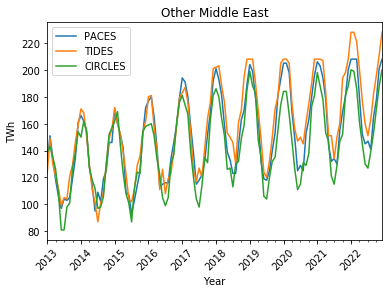

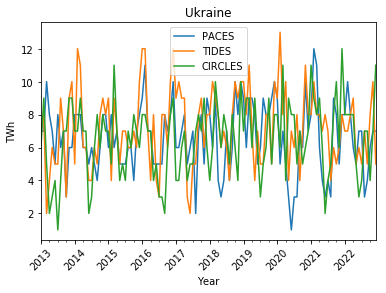

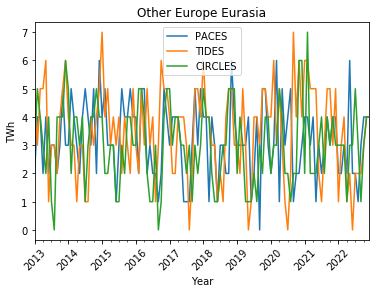

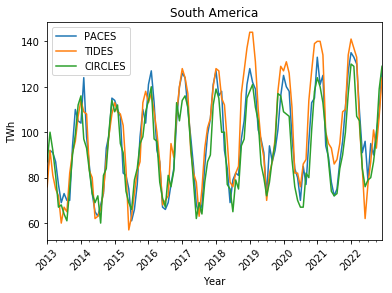

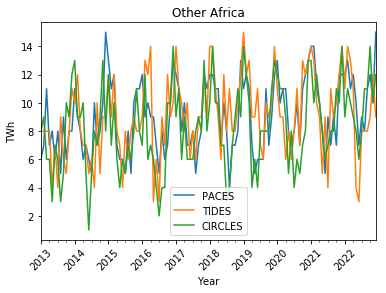

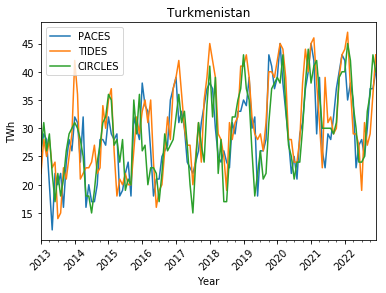

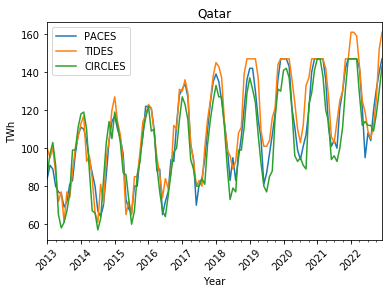

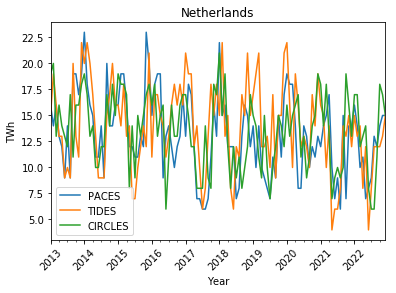

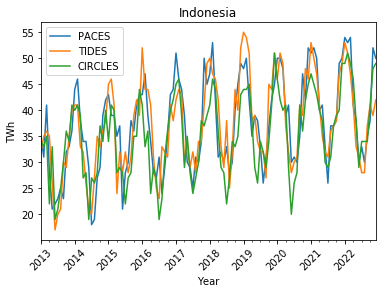

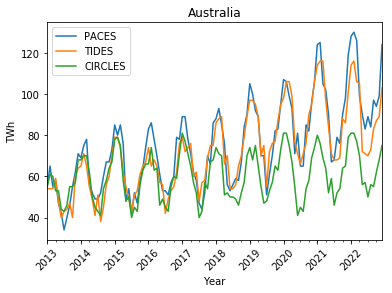

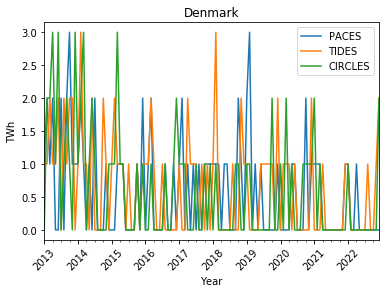

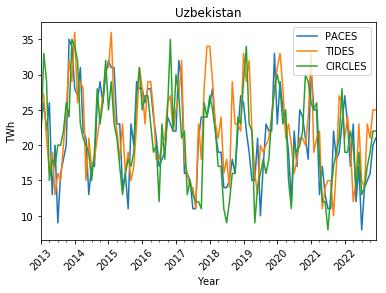

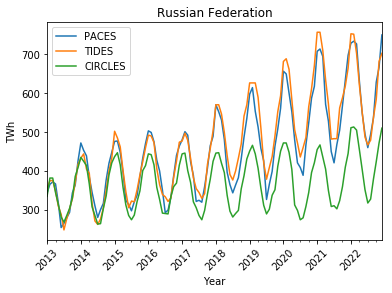

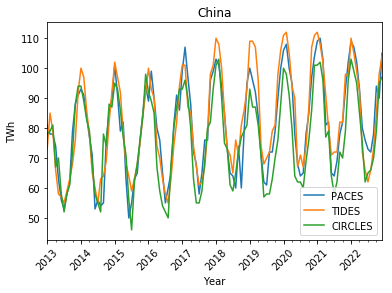

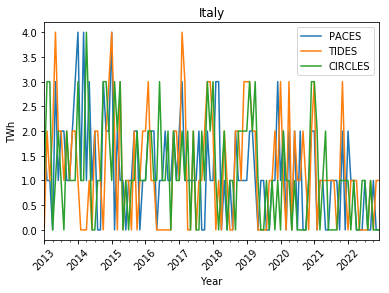

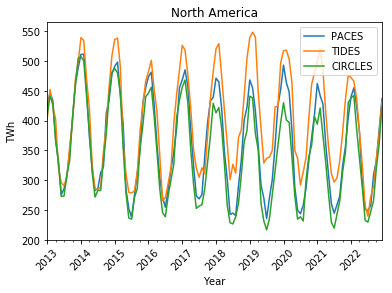

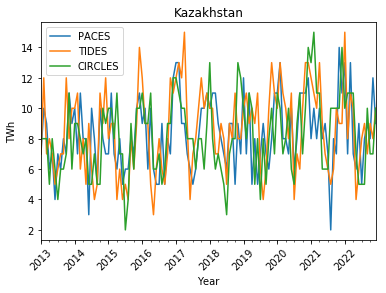

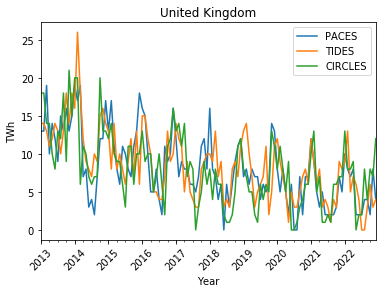

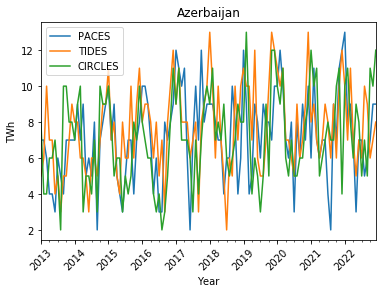

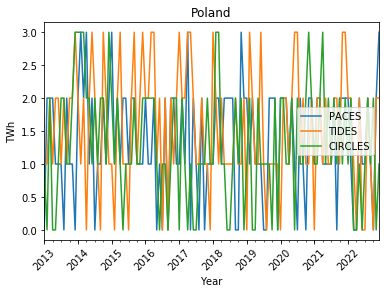

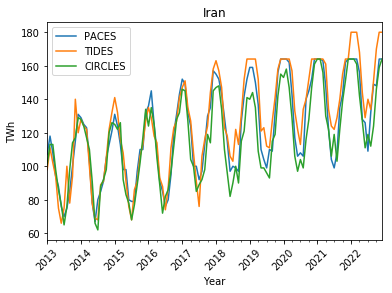

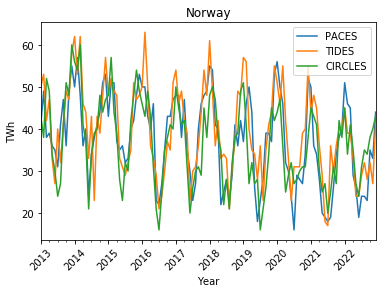

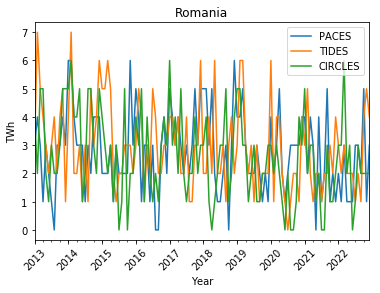

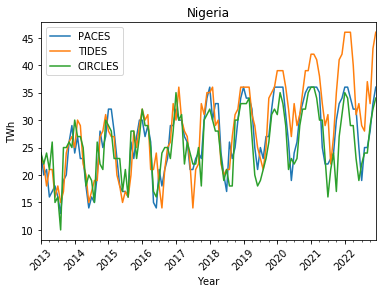

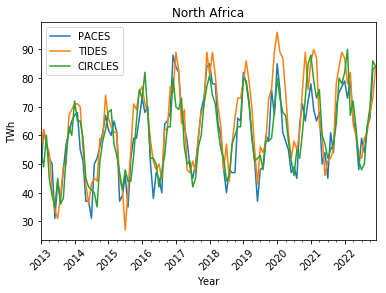

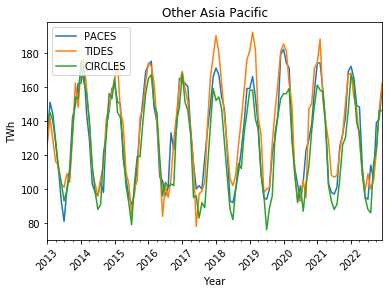

In [26]:
# What did sellers sell?
for seller in init_seller:
    for scen in run_seller:
        df_seller = pd.DataFrame(run_seller[scen])
        df_seller = df_seller[df_seller[3]==seller]
        df_seller = df_seller.set_index(0)
        df_seller.index = pd.to_datetime(df_seller.index)
        df_seller[2].plot(label="%s" % (scen),rot=45, title=seller)
    plt.legend()
    plt.ylabel('TWh')
    plt.xlabel('Year')
    filepath = 'plots/seller_quantity_Monthly_%s.png' %(seller)
    plt.savefig(filepath, bbox_inches='tight')
    plt.show()

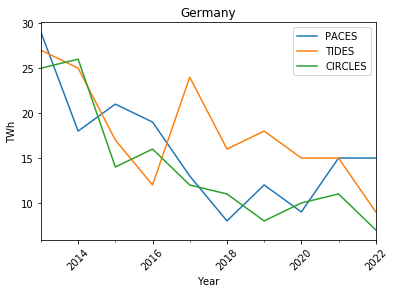

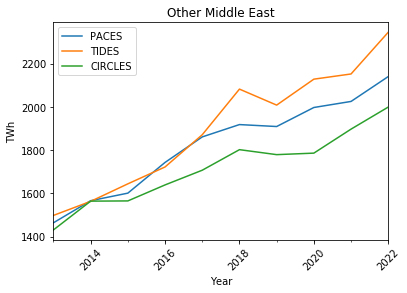

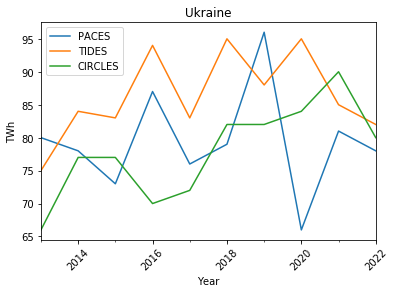

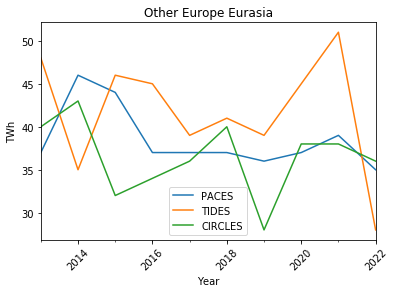

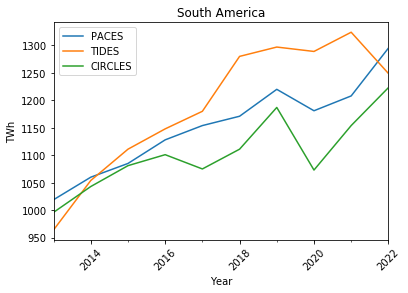

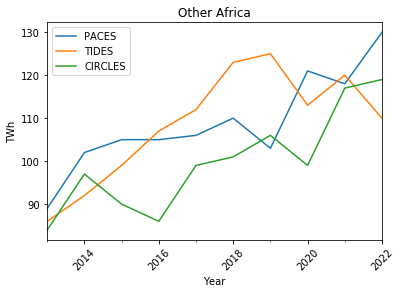

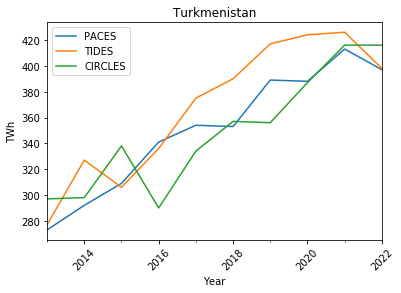

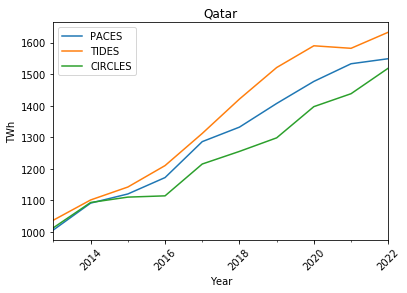

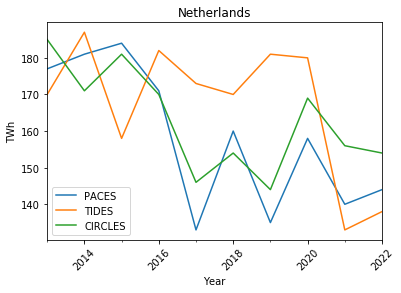

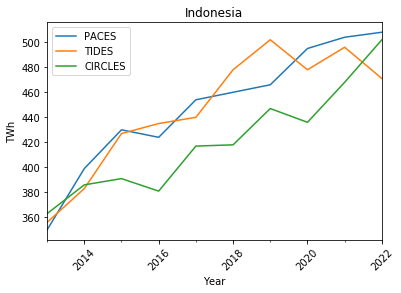

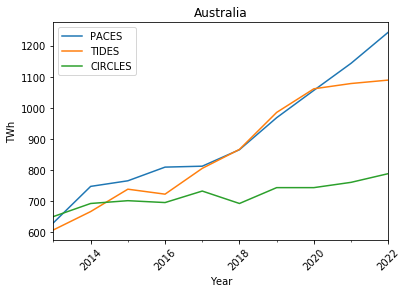

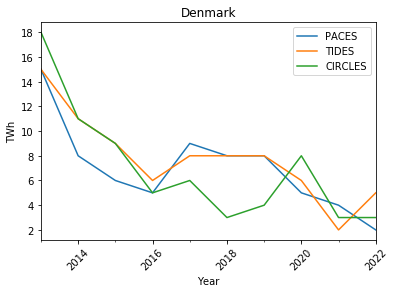

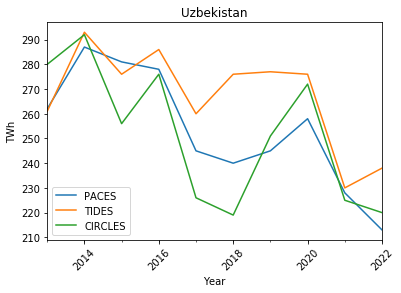

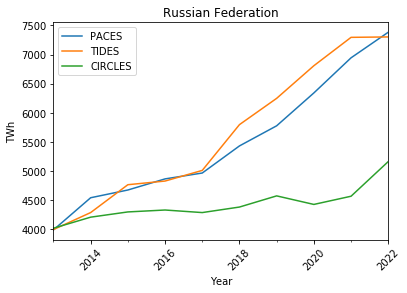

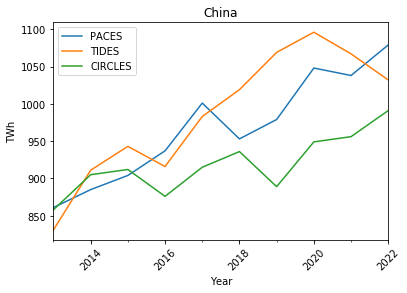

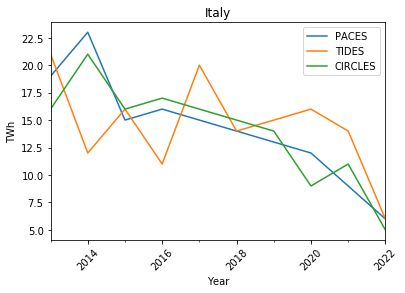

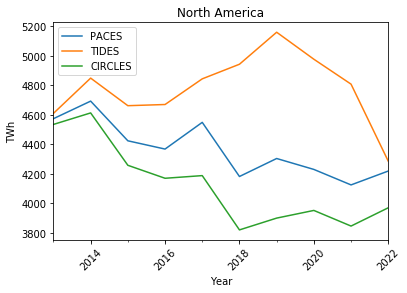

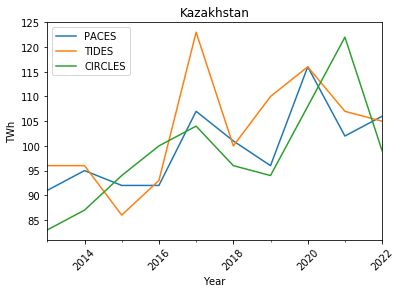

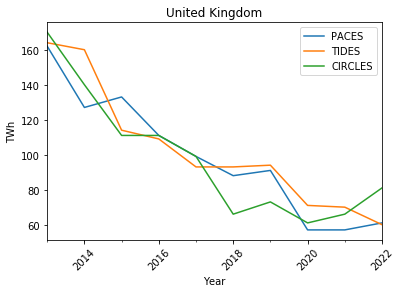

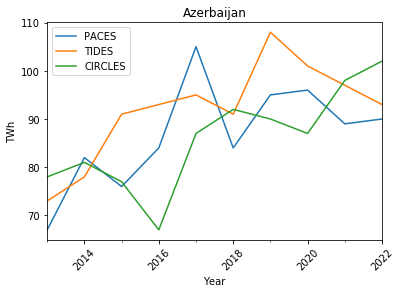

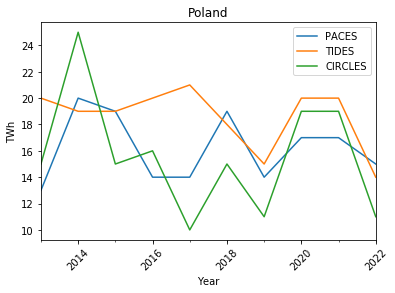

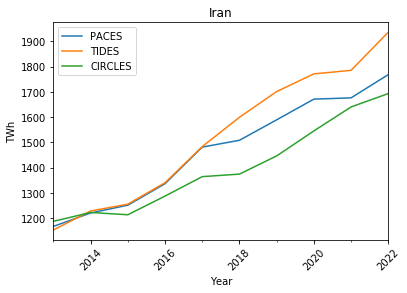

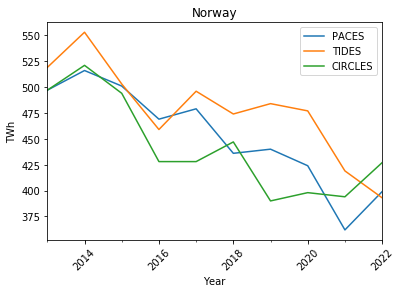

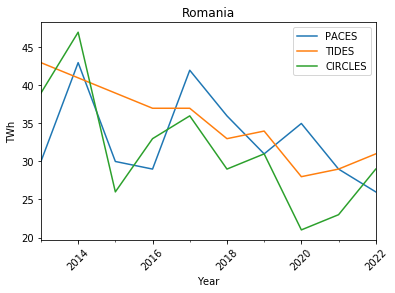

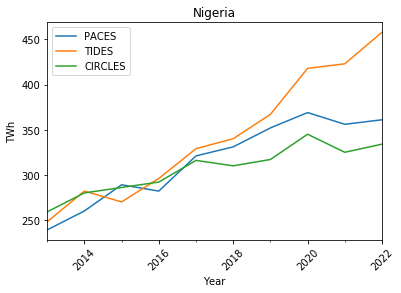

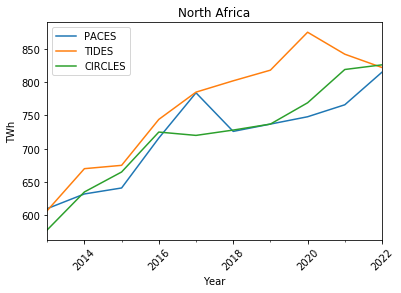

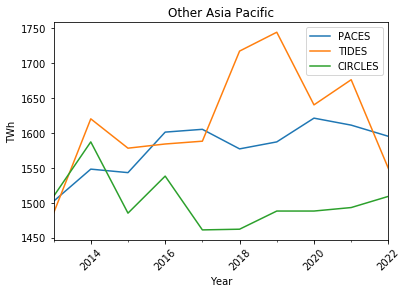

In [27]:
# What did sellers sell?
for seller in init_seller:
    for scen in run_seller:
        df_seller = pd.DataFrame(run_seller[scen])
        df_seller = df_seller[df_seller[3]==seller]
        df_seller = df_seller.set_index(0)
        df_seller.index = pd.to_datetime(df_seller.index)
        df_seller[2].resample('A').sum().plot(label="%s" % (scen),rot=45, title=seller)
    plt.legend()
    plt.ylabel('TWh')
    plt.xlabel('Year')
    filepath = 'plots/seller_quantity_Yearly_%s.png' %(seller)
    plt.savefig(filepath, bbox_inches='tight')
    plt.show()

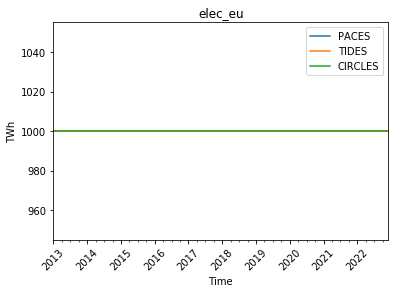

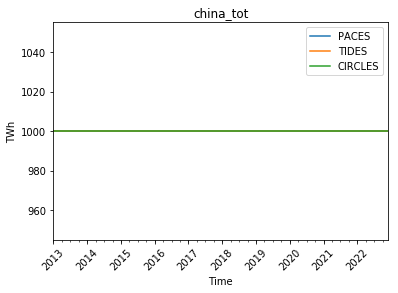

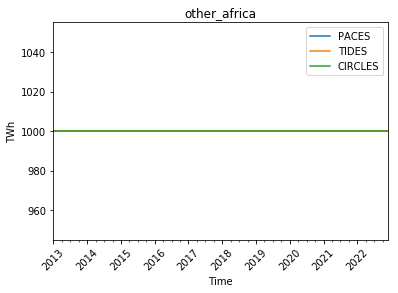

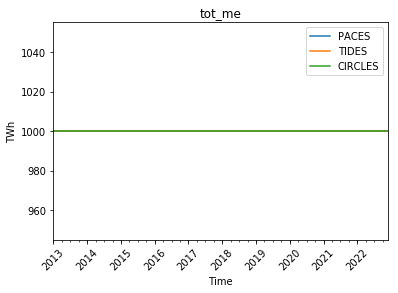

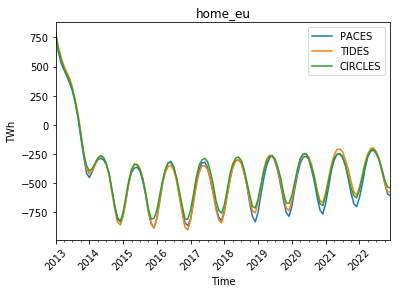

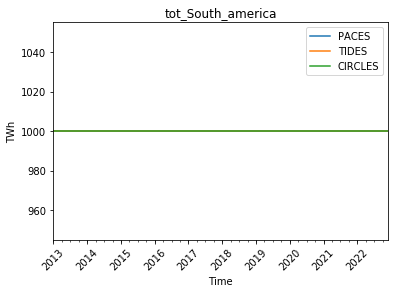

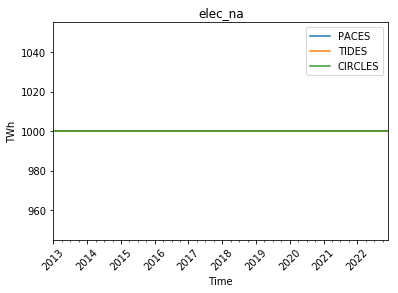

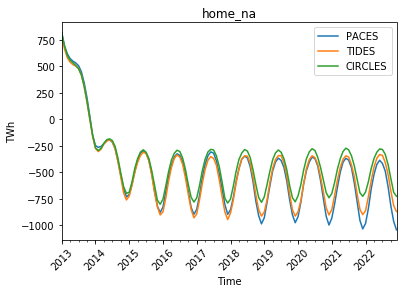

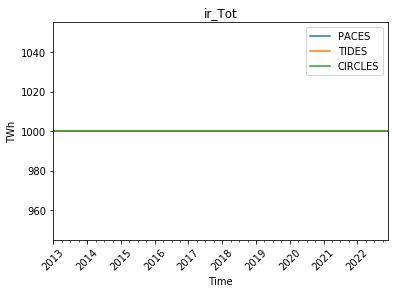

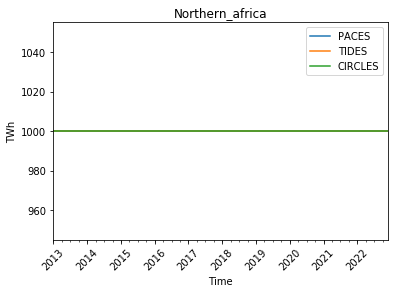

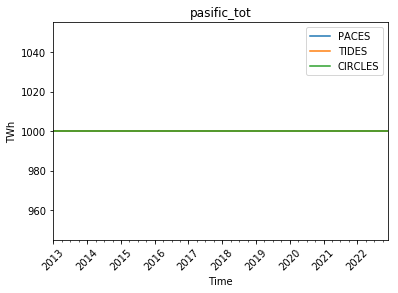

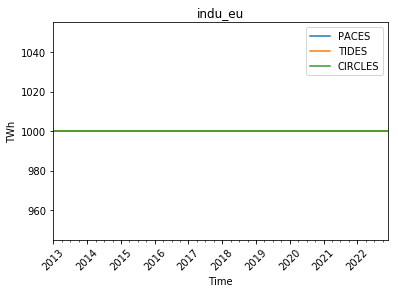

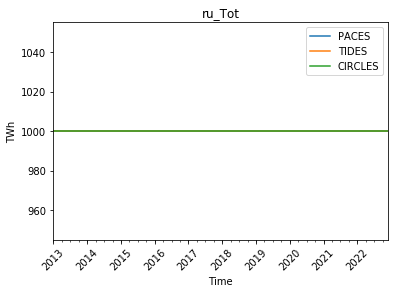

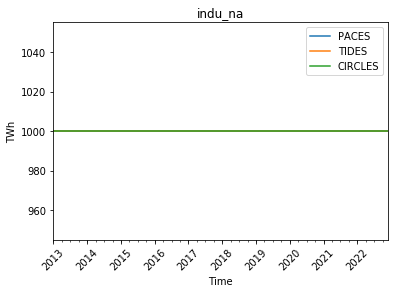

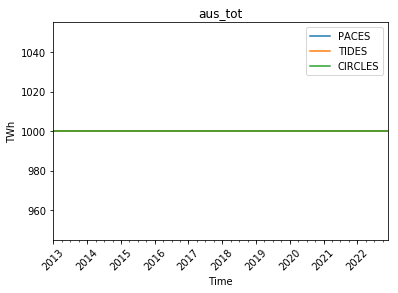

In [28]:
# What did buyers do with their storage space?
for buyer in init_buyer:
    for scen in run_buyer:
        df_buy = pd.DataFrame(run_buyer[scen])
        df_buy = df_buy[df_buy[3]==buyer]
        df_buy = df_buy.set_index(0)
        df_buy.index = pd.to_datetime(df_buy.index)
        df_buy[1].plot(label="%s" % (scen),rot=45, title=buyer)
        #df_buy[2].resample('A').sum().plot(label="%s" % (scen),rot=45, title=buyer)
    plt.legend()
    plt.ylabel('TWh')
    plt.xlabel('Time')
    filepath = 'plots/buyer_quantity_Storage_%s.png' %(buyer)
    plt.savefig(filepath, bbox_inches='tight')
    plt.show()

## Another way of constructing dataframes

testing out datastructure and there performance

In [29]:
new_ar = [i for i in range(10)]
new_ar= [new_ar for i in range(5)]
print('\nthis is the array without numpy \n', new_ar)
new_ar2 = [list(x) for x in zip(*new_ar)]
print('\nthis is the array transposed without numpy \n', pd.DataFrame(new_ar2))
test = np.array([*np.full((1,5),9), *np.full((1,5),8)])
print('\nthis is the numpy array transposed \n', test.T)
df_test = pd.DataFrame(test)
print('\nthis is the dataframe \n',df_test)


this is the array without numpy 
 [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]

this is the array transposed without numpy 
    0  1  2  3  4
0  0  0  0  0  0
1  1  1  1  1  1
2  2  2  2  2  2
3  3  3  3  3  3
4  4  4  4  4  4
5  5  5  5  5  5
6  6  6  6  6  6
7  7  7  7  7  7
8  8  8  8  8  8
9  9  9  9  9  9

this is the numpy array transposed 
 [[9 8]
 [9 8]
 [9 8]
 [9 8]
 [9 8]]

this is the dataframe 
    0  1  2  3  4
0  9  9  9  9  9
1  8  8  8  8  8


In [30]:
list_b = sorted([i for i in range(10)], reverse=True)
list_s = sorted([i for i in range(10)], reverse=False)

print(list_b)
print(list_s)

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [31]:
cleared = 3
list_b[cleared:len(list_b)]

[6, 5, 4, 3, 2, 1, 0]

In [32]:

list_s[cleared:len(list_s)]

[3, 4, 5, 6, 7, 8, 9]